## Challenge Description

Company XYZ is a worldwide e-commerce site with localized versions of the site.
A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than
any other Spanish-speaking country. She therefore went and talked to the international team in
charge of Spain And LatAm to see if they had any ideas about why that was happening.

Spain and LatAm country manager suggested that one reason could be translation. All Spanish-
speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is,
Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican
and so on. Obviously, nothing would change for users from Spain.
After they run the test however, they are really surprised cause the test is negative. I.e., it
appears that the non-localized translation was doing better!

##### You are asked to:
1. Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
2. Explain why that might be happening. Are the localized translations really worse?
3. If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

##### For A/B Testing, a crucial assumption is that the only difference between test and control should be the feature we are testing. 
##### Sample size should be large enough, test and control distribution should be the same

In [1]:
# Import pandas to read the data
import pandas as pd
pd.set_option('display.max_column', 20)
pd.set_option('display.width', 350)

In [2]:
# Read data
user = pd.read_csv('user_table.csv')
test = pd.read_csv('test_table.csv')

print('User Data', user.shape)
print('Test Data', test.shape)

User Data (452867, 4)
Test Data (453321, 9)


In [3]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [4]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [5]:
# Check if the user_ids are unique
print(test['user_id'].nunique() == len(test['user_id']))
print(len(test['user_id']))

True
453321


In [6]:
print(user['user_id'].nunique() == len(user['user_id']))
print(len(user['user_id']))

True
452867


##### From the results above we can find that the user's number is not consistant between two table. 
Just try to get the common data from both tables.

In [7]:
# Inner join two tables
merge = user.merge(test, on=['user_id'])
merge.head()

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0


In [8]:
# Check the datatype for merge dataset
merge.info()
merge.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 452866
Data columns (total 12 columns):
user_id             452867 non-null int64
sex                 452867 non-null object
age                 452867 non-null int64
country             452867 non-null object
date                452867 non-null object
source              452867 non-null object
device              452867 non-null object
browser_language    452867 non-null object
ads_channel         181693 non-null object
browser             452867 non-null object
conversion          452867 non-null int64
test                452867 non-null int64
dtypes: int64(4), object(8)
memory usage: 44.9+ MB


,user_id,age,conversion,test
count,452867.000000,452867.000000,452867.000000,452867.000000
mean,499944.805166,27.130740,0.049560,0.476462
std,288676.264784,6.776678,0.217034,0.499446
min,1.000000,18.000000,0.000000,0.000000
25%,249819.000000,22.000000,0.000000,0.000000
50%,500019.000000,26.000000,0.000000,0.000000
75%,749543.000000,31.000000,0.000000,1.000000
max,1000000.000000,70.000000,1.000000,1.000000


In [9]:
# convert the date to datetime format
merge.date = pd.to_datetime(merge.date)

In [10]:
merge.info()
merge.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 452866
Data columns (total 12 columns):
user_id             452867 non-null int64
sex                 452867 non-null object
age                 452867 non-null int64
country             452867 non-null object
date                452867 non-null datetime64[ns]
source              452867 non-null object
device              452867 non-null object
browser_language    452867 non-null object
ads_channel         181693 non-null object
browser             452867 non-null object
conversion          452867 non-null int64
test                452867 non-null int64
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 44.9+ MB


,user_id,age,conversion,test
count,452867.000000,452867.000000,452867.000000,452867.000000
mean,499944.805166,27.130740,0.049560,0.476462
std,288676.264784,6.776678,0.217034,0.499446
min,1.000000,18.000000,0.000000,0.000000
25%,249819.000000,22.000000,0.000000,0.000000
50%,500019.000000,26.000000,0.000000,0.000000
75%,749543.000000,31.000000,0.000000,1.000000
max,1000000.000000,70.000000,1.000000,1.000000


In [11]:
# Check the sample size for both old and new versions
print('Old Version Size:' ,merge.query('test == 0')['user_id'].count())
print('New Version Size:' ,merge.query('test == 1')['user_id'].count())

Old Version Size: 237093
New Version Size: 215774


#### Q1：Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better 

In [12]:
# get the average conversion rate of old version per country
country_conversion = merge.query('test == 0').groupby('country')['conversion'].mean()
print(country_conversion.sort_values(ascending = False))

country
Spain          0.079719
El Salvador    0.053554
Nicaragua      0.052647
Costa Rica     0.052256
Colombia       0.052089
Honduras       0.050906
Guatemala      0.050643
Venezuela      0.050344
Peru           0.049914
Mexico         0.049495
Bolivia        0.049369
Ecuador        0.049154
Paraguay       0.048493
Chile          0.048107
Panama         0.046796
Argentina      0.015071
Uruguay        0.012048
Name: conversion, dtype: float64


##### From the result we can find that Spain is the country with the highest conversion rate.

In [13]:
# use t-test to test if the localized translation works better or not.
from scipy import stats

# Because nothing changed in Spain, so we should exclude Spain users.
test_data = merge.query('country != "Spain"')

# t-test of test and control for our target metrics
test = stats.ttest_ind(test_data[test_data['test'] == 1]['conversion'],
                       test_data[test_data['test'] == 0]['conversion'],
                       equal_var=False)

print(merge.groupby('test')['conversion'].mean())

test
0    0.055156
1    0.043411
Name: conversion, dtype: float64


In [14]:
print(test.statistic)

-7.353895203080277


In [15]:
print(test.pvalue)

1.928917857779903e-13


From the test result seems control users are converting at 5.5% while users in the test just at 4.3%. So for question 1, the test result is trully negative.

The most likely reason for weird A/B test results are:

- Sample size: we didn't collect enough data.
- Some bias has been included in the experiment so that the test/control people are not really random.

To find out if the result is true or not, let's try to plot the data by day, to see if these weird results have been constantly happening or they just started happening suddenly.

In [16]:
import matplotlib.pyplot as plt

# compare test and control conversion rate by day and plot it.
merge_by_day = merge.groupby('date')['conversion'].agg({
    'test_vs_control': lambda x: x[merge['test'] == 1].mean()/x[merge['test'] == 0].mean()}).plot()

                                    

C:\Users\stell\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """


From the plot, we can know that:

1. Test has constantly been worse than control and there is relatively little variance across days. That may caused by sample size, but there was some bias in the experiment set up.

2. We just ran the test for 5 days. Normally we should always run at least a full week to capture weekly pattern, 2 weeks would be much better.

##### Let's try to find the bias. There is some segment of users more likely to end up in test or in control. This segment had a significantly above/below conversion rate and this affected the overall result. 

Check the randomization  
It means all variables have the same distribution in test and control. For example, for the first variable, source, it would mean checking the proportion of users coming from ads, SEO, and direct is the same.

In [17]:
# groupby source and estimate relative frequencies
data_grouped_source = merge.groupby('source')['test'].agg({
    "frequency_test_0":lambda x: len(x[x==0]),
    "frequency_test_1":lambda x: len(x[x==1])
})

# get relative frequencies

C:\Users\stell\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


In [18]:
print(data_grouped_source/data_grouped_source.sum())

        frequency_test_0  frequency_test_1
source                                    
Ads             0.401720          0.400641
Direct          0.201149          0.199500
SEO             0.397131          0.399858


As we can see, relative frequency of source for different segmaents is the same. we have basically the same proportion of users coming from three difference source in both test and control.

Use decision tree to clearly see which variable is used for the split. That's where randomization failed.

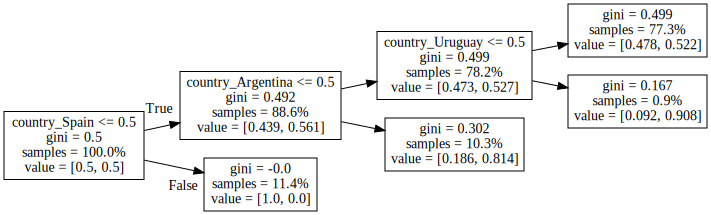

In [25]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

#make date as string, so few dates that makes sense to have them a few dummy values
merge['date'] = merge['date'].apply(str)

#make dummy vars.
data_dummy = pd.get_dummies(merge)
#model features, test is the lable and conversion is not needed
train_cols = data_dummy.drop(['test','conversion'],axis = 1)

tree = DecisionTreeClassifier(
    #change weights. Our data set is now balanced.
    class_weight="balanced",
    # only split if its worthwhile. default value as 0 means always split which may increase noisy and irrelecant splits
    min_impurity_decrease= 0.001)

tree.fit(train_cols, data_dummy['test'])

export_graphviz(tree, out_file="tree_test", feature_names=train_cols.columns, proportion=True, rotate = True)
with open("tree_test") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))